In [1]:
import itertools
import matplotlib.pyplot as plt

In [9]:
def P_n(p, n):
    P = 0
    P_extra = 0.5
    combo = list(itertools.combinations(p, n))
    for case in combo:
        tmp_p = []
        for el in p:
            tmp_p.append(el)
        tmp = 1
        tmp_case = []
        for elem in case:
            tmp *= elem
            tmp_case.append(elem)
            print('+:', elem, end = ' | ')
        for ver in p:
            if ver in tmp_case:
                tmp_p.pop(tmp_p.index(ver))
                tmp_case.pop(tmp_case.index(ver))
        for ver in tmp_p:
            tmp *= (1 - ver)*P_extra
            print('-:', round(1 - ver, 5), end = ' | ')
        print('P =', round(tmp, 5))
        P += tmp
        tmp_p = p
    return round(P, 5)

In [20]:
n = [0, 1, 2, 3]
p = [0.7, 0.8, 0.9]
P_sum, P = [], []
for case in n:
    P.append(P_n(p, case))
    if case != 0:
        P_sum.append(P[-1]+ P_sum[-1])
    else:
        P_sum.append(P[-1])
    
print(P)
print(P_sum)

-: 0.3 | -: 0.2 | -: 0.1 | P = 0.00075
+: 0.7 | -: 0.2 | -: 0.1 | P = 0.0035
+: 0.8 | -: 0.3 | -: 0.1 | P = 0.006
+: 0.9 | -: 0.3 | -: 0.2 | P = 0.0135
+: 0.7 | +: 0.8 | -: 0.1 | P = 0.028
+: 0.7 | +: 0.9 | -: 0.2 | P = 0.063
+: 0.8 | +: 0.9 | -: 0.3 | P = 0.108
+: 0.7 | +: 0.8 | +: 0.9 | P = 0.504
[0.00075, 0.023, 0.199, 0.504]
[0.00075, 0.02375, 0.22275, 0.72675]


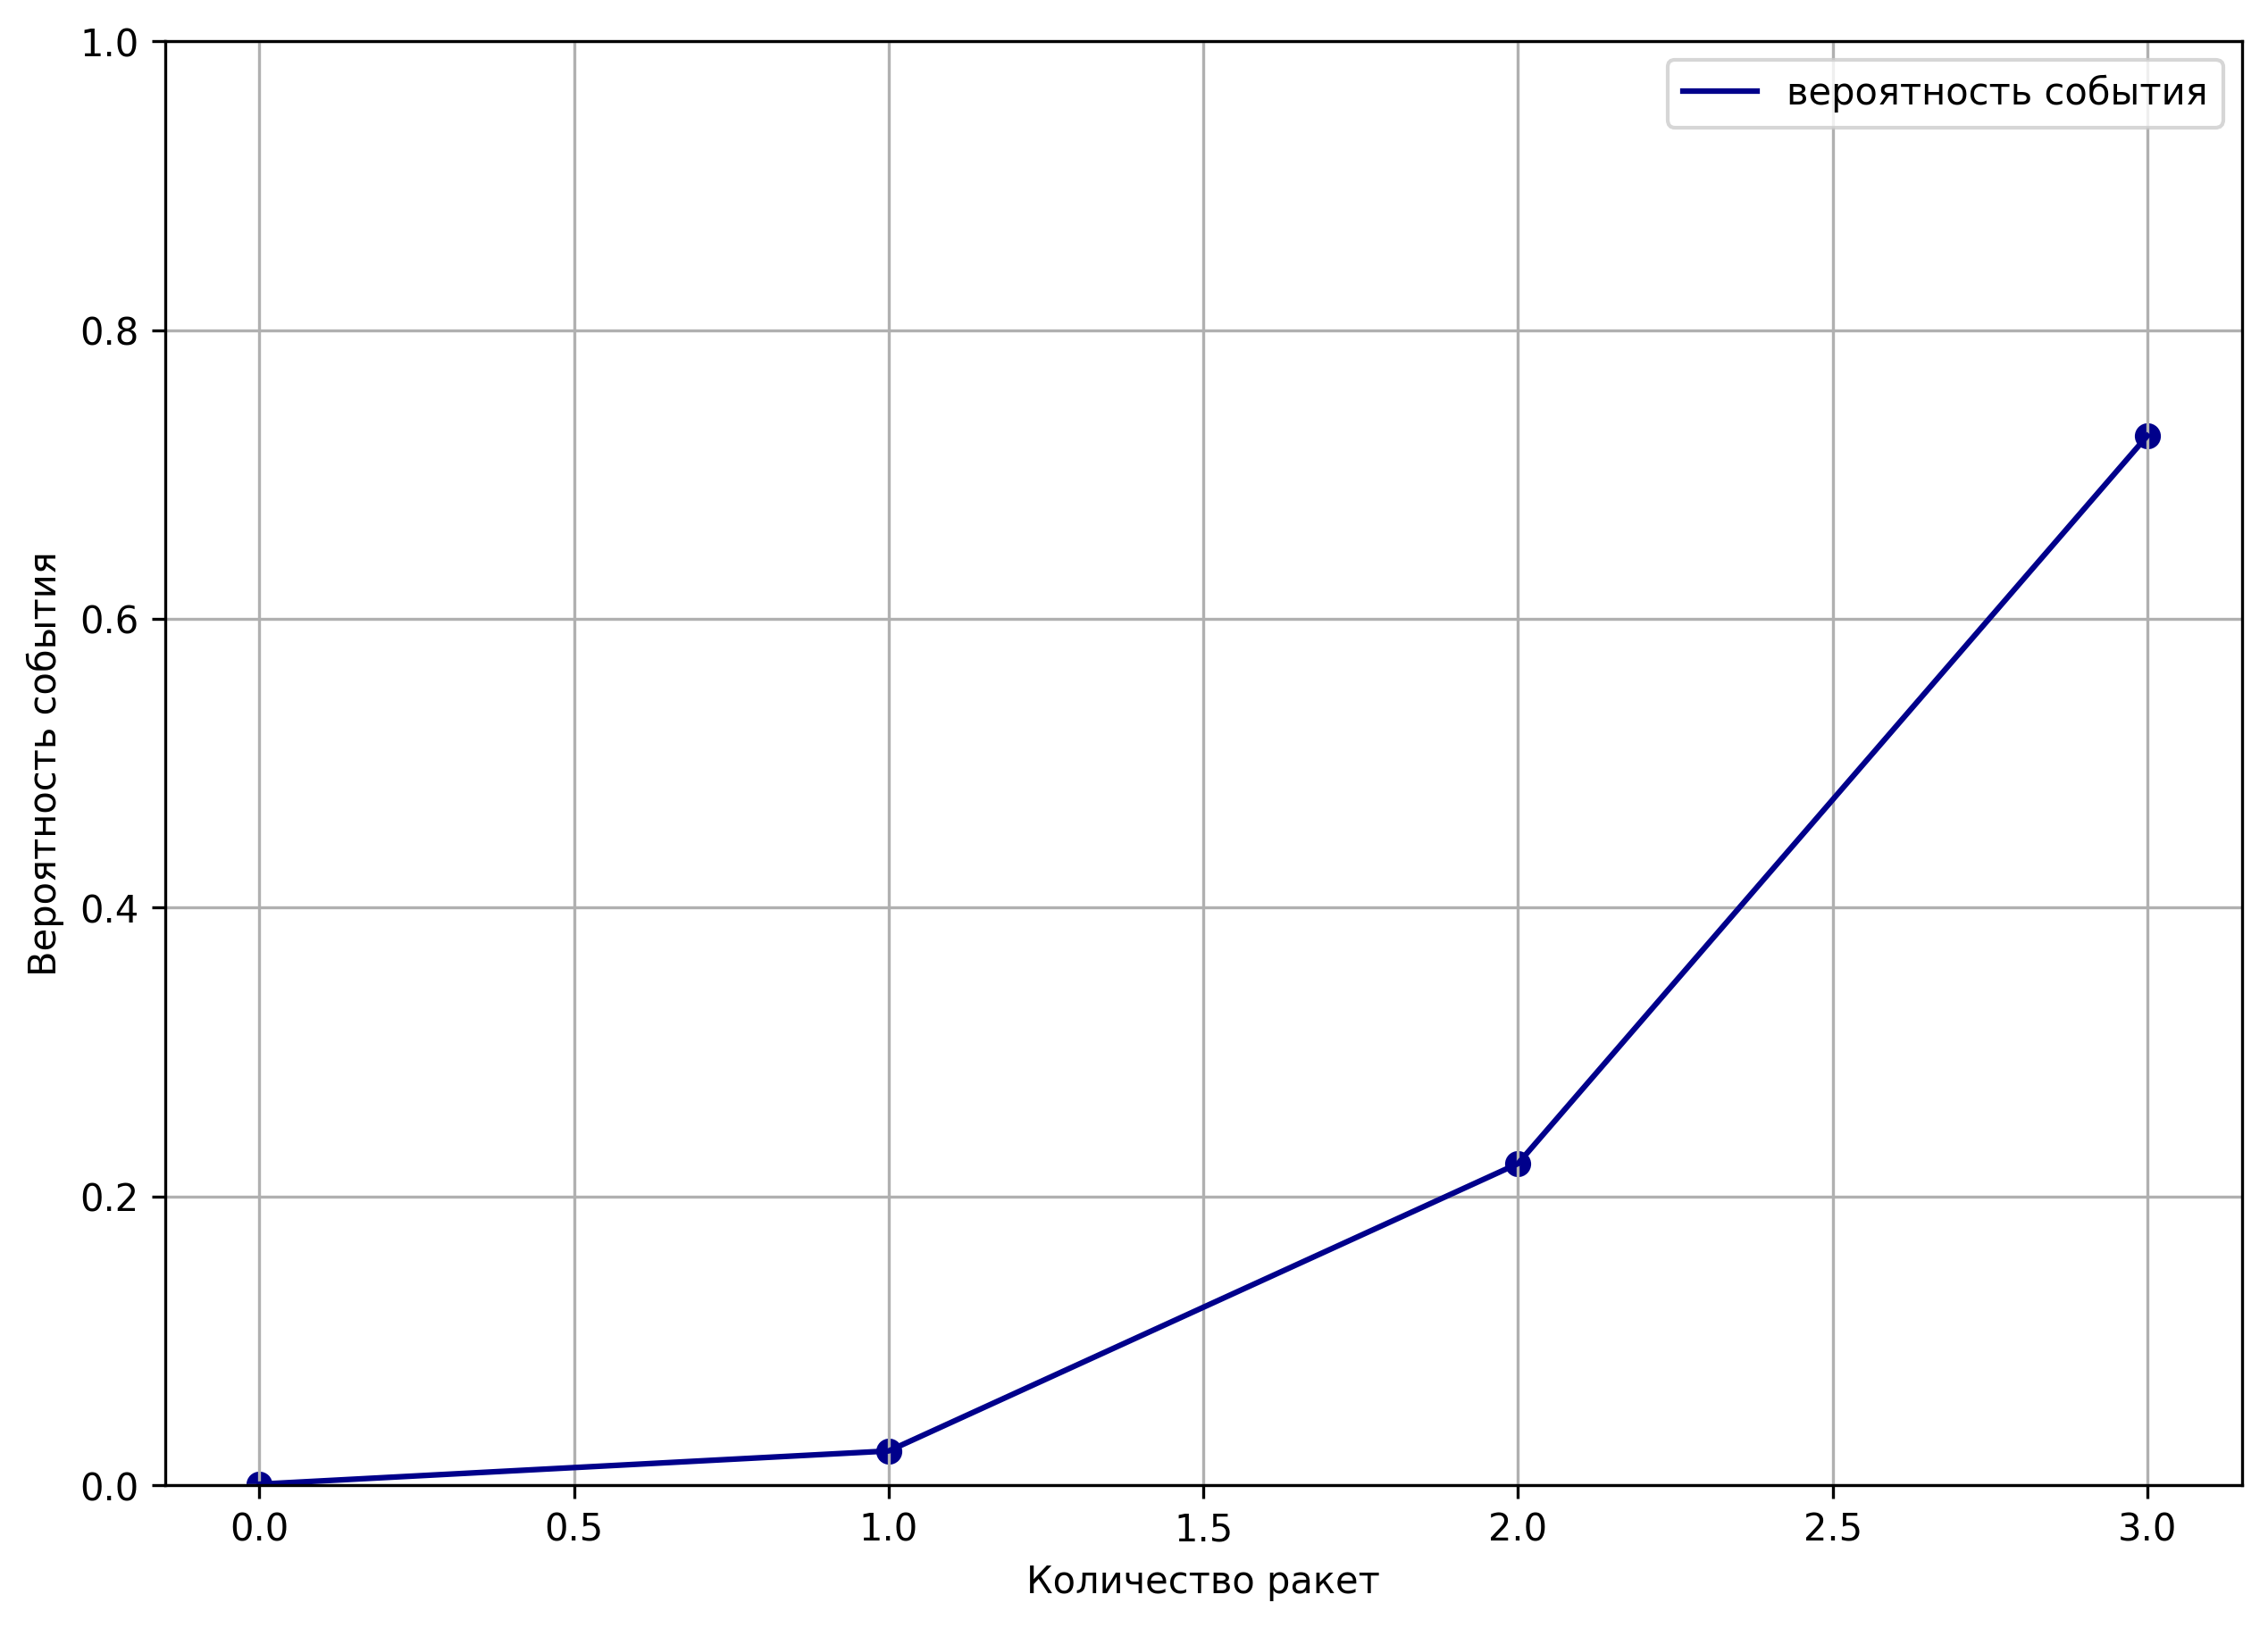

In [21]:
fig, ax = plt.subplots(figsize=(10, 7), dpi=300)
#plt.plot(P, label = 'в точности', color = 'deeppink')
#plt.scatter(n, P, color = 'deeppink')
plt.plot(P_sum, label = 'вероятность события', color = 'darkblue')
plt.scatter(n, P_sum, color = 'darkblue')
plt.ylim(0, 1)
plt.grid()
#plt.vlines(m_sr, 0, 1, colors='black', linestyles=':', label='Среднее необходимое')
plt.xlabel('Количество ракет')
plt.ylabel('Вероятность события')
plt.legend()
plt.show()